In [2]:
# change to True if you use Google Colaboratory:
GoogleColaboratory = False

In [3]:
import os, sys, importlib

if GoogleColaboratory :

    !pip3 install healpy
    
    user = "mahlers77"
    repo = "KSETA2023"

    if os.path.isdir(repo):
        !rm -rf {repo}

    !git clone https://github.com/{user}/{repo}.git

    if not repo in sys.path:
        sys.path.insert(1, repo)

else :
    repo = "."

#for path in sys.path : 
#  print(path)

In [4]:
%matplotlib inline
import numpy as np
import healpy as H
from pylab import *
import matplotlib.pyplot as plt
from scipy.special import erf

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


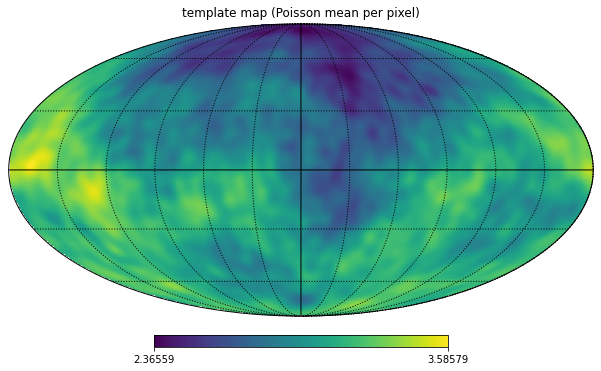

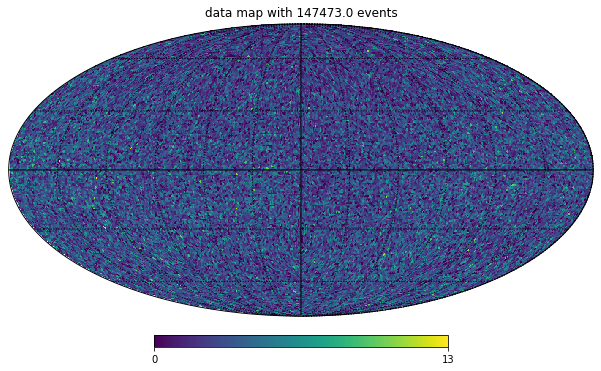

In [30]:
nside = 64
npix = H.nside2npix(nside)

LMAX = 40

truemap = H.read_map(repo + '/data/CRA_example/truemap1.fits')
H.mollview(truemap,title='template map (Poisson mean per pixel)')
H.graticule()

eventmap = H.read_map(repo + '/data/CRA_example/eventmap1.fits')
H.mollview(eventmap,title='data map with ' + str(totevents) + ' events')
H.graticule()

totevents = sum(eventmap)

# normalized power spectrum for truemap
out = H.anafast(truemap,alm=True,lmax=LMAX)	
Cltrue = out[0]/out[0][0] # normalize by C0

out = H.anafast(eventmap,alm=True,lmax=LMAX)	
Clobs = out[0]/out[0][0]  # normalize by C0


In [31]:
#generate the level of background from scrambling

Clbg = np.zeros((RUNS,LMAX+1),dtype=np.double)

RUNS = 1000

for run in range(0,RUNS) :

    np.random.shuffle(eventmap)
    out = H.anafast(eventmap,alm=True,lmax=LMAX)
    Clbg[run] = out[0]/out[0][0]

Cl5 = np.zeros(LMAX+1,dtype=np.double)
Cl50 = np.zeros(LMAX+1,dtype=np.double)
Cl95 = np.zeros(LMAX+1,dtype=np.double)

temp = np.transpose(Clbg)
for i in range(0,LMAX+1) :
    Cl5[i] = np.percentile(temp[i],5.0)
    Cl50[i] = np.percentile(temp[i],50.0)
    Cl95[i] = np.percentile(temp[i],95.0)

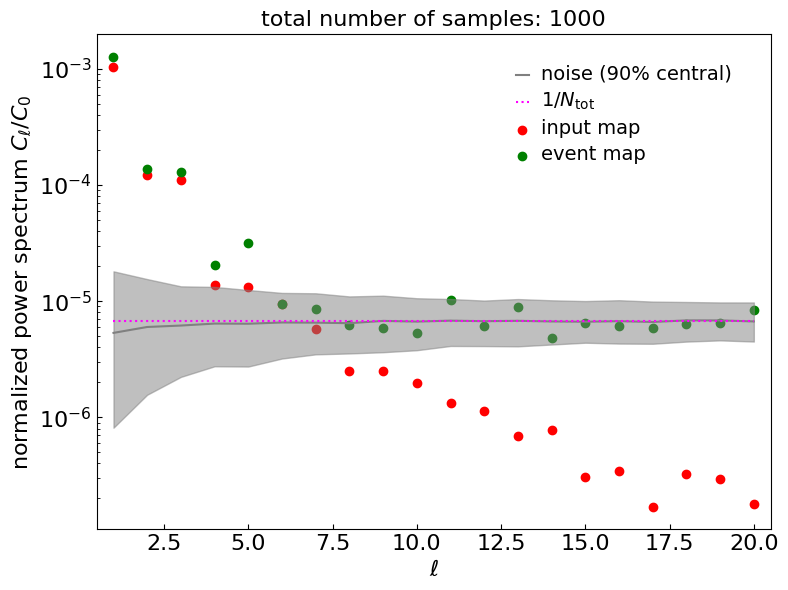

In [35]:
# plot histograms of simulation

fig = figure(dpi=100,tight_layout=True,figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
xlim([0.5,20.5])

title(r'total number of samples: ' + str(RUNS),fontsize=16)
xlabel(r'$\ell$',fontsize=16)
ylabel(r'normalized power spectrum $C_\ell/C_0$',fontsize=16)
ax.tick_params(axis='both',which='both',direction='in')

for tick in ax.xaxis.get_major_ticks() :
    tick.label.set_fontsize(16) 

for tick in ax.yaxis.get_major_ticks() :
    tick.label.set_fontsize(16)  
    
ax.set_yscale('log')

x = np.arange(1,21,1)

scatter(x,Cltrue[1:21],color='red',label=r'input map')
scatter(x,Clobs[1:21],color='green',label=r'event map')
plot(x,Cl50[1:21],color='gray',label=r'noise (90% central)')
ax.fill_between(x,Cl5[1:21],Cl95[1:21],color='gray',alpha=0.5)
plot(x,1./totevents*x**0,color='magenta',linestyle='dotted',label=r'$1/N_{\rm tot}$')

leg = plt.legend(bbox_to_anchor=(0.95, 0.95), loc=1, borderaxespad=0.,fancybox=False,\
                 framealpha=0.0,frameon=True,numpoints=1, scatterpoints = 1,handlelength=1)
for t in leg.get_texts() :
    t.set_fontsize(14)

plt.show()